In [59]:
import numpy as np
import pandas as pd

from sklearn.metrics import mean_squared_error

from matplotlib import pyplot as plt
from scipy.stats import gaussian_kde

from scipy.special import kl_div, rel_entr

In [60]:
def KL(a, b):
    a = np.asarray(a, dtype=np.float32)
    b = np.asarray(b, dtype=np.float32)

    return np.sum(np.where(a != 0, a * np.log(a / b), 0))

def kl_divergence(I: np.ndarray, J: np.ndarray):
    def probability_dist(I):
        return (
            np.histogramdd(np.ravel(I), bins=I.size // 2)[0] / I.size
        )
    
    epsilon = 1e-10
    P = probability_dist(I) + epsilon
    Q = probability_dist(J) + epsilon
    
    return np.where(P != 0, P * np.log2(P / Q), 0).sum()

In [73]:
year = 2016
qian_df = pd.read_csv(f'../eval/Qian_Eval_{year}.csv')

high_df = qian_df[qian_df['truth_pm25'] >= 35]

print(f"All Records: {qian_df.shape}")
print(f"All RMSE: {mean_squared_error(qian_df['truth_pm25'], qian_df['qian_pm25'], squared=False)}")
print(f"All MBE: {np.mean(qian_df['qian_pm25'] - qian_df['truth_pm25'])}")
print(f"All KL Div: {kl_divergence(qian_df['truth_pm25'], qian_df['qian_pm25'])}")

print(f"ST-High Records: {high_df.shape}")
print(f"ST-High RMSE: {mean_squared_error(high_df['truth_pm25'], high_df['qian_pm25'], squared=False)}")
print(f"ST-High MBE: {np.mean(high_df['qian_pm25'] - high_df['truth_pm25'])}")
print(f"ST-High KL Div: {kl_divergence(high_df['truth_pm25'], high_df['qian_pm25'])}")

All Records: (204173, 5)
All RMSE: 3.5413729820068145
All MBE: -0.2524074095323976
All KL Div: 5.472905175647825
ST-High Records: (597, 5)
ST-High RMSE: 33.833399456442486
ST-High MBE: -16.06895765194474
ST-High KL Div: 1.9349421012589822


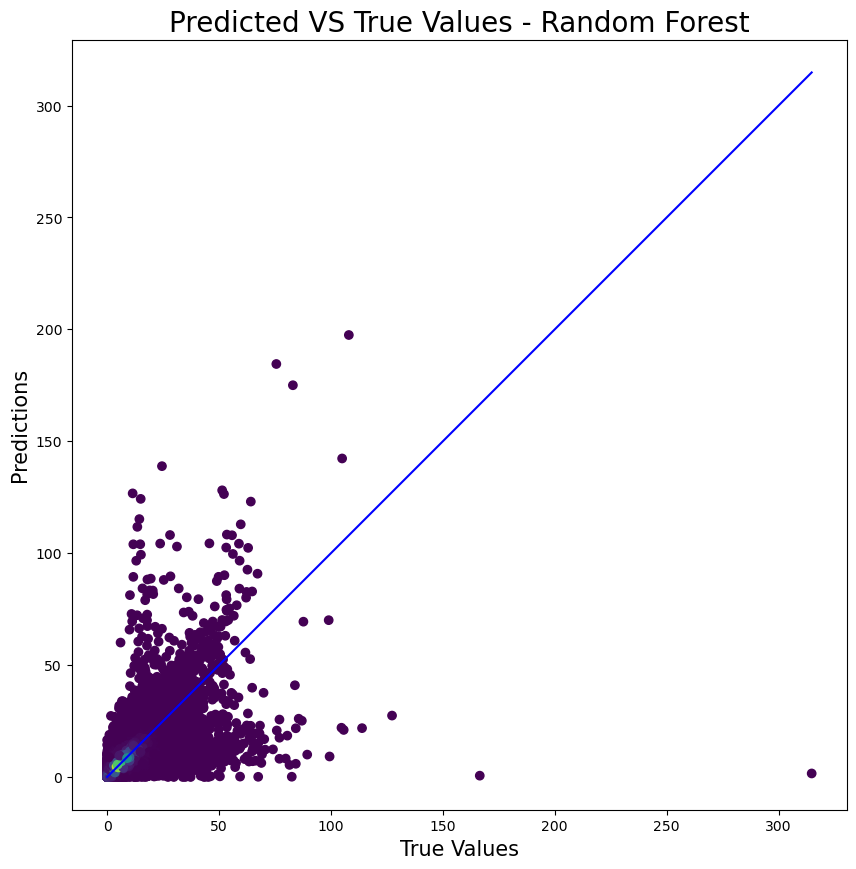

In [52]:
# Viz Scatter
plt.figure(figsize=(10, 10))
xy = np.vstack([qian_df['truth_pm25'], qian_df['qian_pm25']])
z = gaussian_kde(xy)(xy)
plt.scatter(qian_df['truth_pm25'], qian_df['qian_pm25'], c=z)
# plt.yscale('log')
# plt.xscale('log')

p1 = max(max(qian_df['truth_pm25']), max(qian_df['qian_pm25']))
p2 = min(min(qian_df['truth_pm25']), min(qian_df['qian_pm25']))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)

plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.title('Predicted VS True Values - Random Forest', fontsize=20)

plt.savefig(f"../eval/qian_img/qian_pred_truth_{year}.png")